In [1]:
import numpy as np
import pandas as pd
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance

import scipy.stats as scst
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid") # make the plot (like histogram) has clearer looking

In [2]:
np.random.seed(999)

In [3]:
def simu_function(lamb,n, N):
    ave = np.arange(N)
    for i in range(N):
        x = np.random.exponential(scale=lamb, size=n)
        ave[i] = mean(x)
    return(ave)

#print(simu_function(5000, 30, 100) )

In [4]:
# Qa
ave = simu_function(5000, 30, 100) # N = 100
print(ave) # 100 values of sample means from 100 samples
print('standard deviation of N sample means is: ',ave.std())

[3850 7192 6588 5989 5370 5666 4914 3804 4958 4541 4901 4661 5801 3389
 4348 4729 4886 3177 3748 6976 3692 6709 4863 4550 4351 5395 4574 5605
 4868 4288 6310 5609 6381 4110 5677 5577 4553 3838 3851 5144 3010 4211
 4025 5333 4020 5130 4443 5169 4617 6191 4647 4226 5287 4955 5407 4347
 4012 3510 6039 3677 5339 5211 5986 4211 4679 5428 5549 3685 3716 6423
 4296 5402 4763 5069 5902 4203 4407 3967 5382 5256 5185 4877 4574 5038
 4668 4741 5300 4538 4297 4937 4476 4334 5622 4363 4707 5110 4994 4807
 5762 5580]
standard deviation of N sample means is:  833.2819673435877


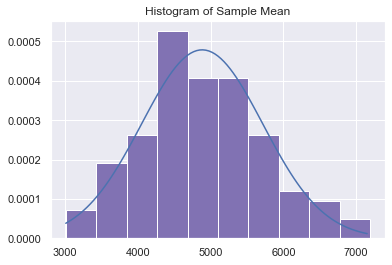

(0.9902994632720947, 0.6888114809989929)


In [6]:
# Qb
N = 100
l = list(np.arange(min(ave),max(ave), step = (max(ave) - min(ave))/N  ))
y = scst.norm.pdf(l,loc = mean(ave),scale = np.std(ave)) 
plt.plot(l, y)
plt.hist(ave,  range=None, density=True, color='C4')
plt.title('Histogram of Sample Mean') 
plt.show()

print(scst.shapiro(ave))
# p-value should be large

In [7]:
# check the rule of thumb:

print( [mean(ave) - 2*np.std(ave), mean(ave) + 2*np.std(ave)] ) # interval of 2sd away from mean

data =  pd.DataFrame(ave, columns = ['ave'])

more = data[data.ave > ( mean(ave) + 2*np.std(ave) )] # values of sample mean that out of interval (right)

less = data[data.ave < ( mean(ave) - 2*np.std(ave) )] # values of sample mean that out of interval (left)

print (len(more) + len(less) ) # should be around 0.05*N, might not exactly equal to 0.05*N


[3217.4360653128247, 6550.563934687176]
6


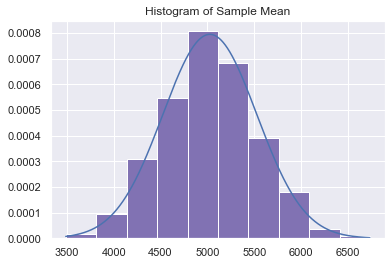

(0.9990859627723694, 0.9137346148490906)


In [8]:
# Qc N = 1000, n = 100
ave = simu_function(5000, 100, 1000) # N increased to 1000, the size of each sample increases to n = 100
N = 1000
l = list(np.arange(min(ave),max(ave), step = (max(ave) - min(ave))/N  ))
y = scst.norm.pdf(l,loc = mean(ave),scale = np.std(ave)) 
plt.plot(l, y)
plt.hist(ave,  range=None, density=True, color='C4')
plt.title('Histogram of Sample Mean') 
plt.show()

print(scst.shapiro(ave))
# p-value should be very large

# the histogram is well bell-shaped, resemble a normal distribution well.
# compared to (b) when n = 30, then this one is better normally distributed.
# Question: it's because of the increase in N or in n? 
# to answer, we'll try Qd where N = 1000 again but n is dropped to 7.

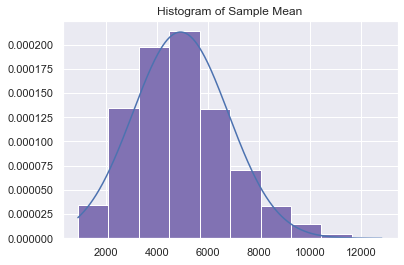

(0.9769242405891418, 1.6619592854705267e-11)


In [9]:
# Qd N = 1000, n = 7
ave = simu_function(5000, 7, 1000) # N = 1000, BUT the size of each sample is only 7
N = 1000
l = list(np.arange(min(ave),max(ave), step = (max(ave) - min(ave))/N  ))
y = scst.norm.pdf(l,loc = mean(ave),scale = np.std(ave)) 
plt.plot(l, y)
plt.hist(ave,  range=None, density=True, color='C4')
plt.title('Histogram of Sample Mean') 
plt.show()

# the histogram is skewed
print(scst.shapiro(ave)) # for n = 7
# p-value is very small, indicating NON-NORMAL

In [ ]:
# Comment
# the histogram is skewed, not symmetric.
# compared to (c) when N = 1000, and n = 100
# when dropping n = 100 to n = 7, the histogram of sample means is NO longer normal.
# Hence, n - the sample of each size has great impact on the normal approximation

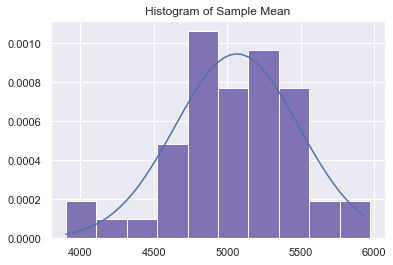

(0.9741418957710266, 0.33825427293777466)


In [10]:
# Qe N = 50, n = 100
ave = simu_function(5000, 100, 50) 
N = 50
l = list(np.arange(min(ave),max(ave), step = (max(ave) - min(ave))/N  ))
y = scst.norm.pdf(l,loc = mean(ave),scale = np.std(ave)) 
plt.plot(l, y)
plt.hist(ave,  range=None, density=True, color='C4')
plt.title('Histogram of Sample Mean') 
plt.show()

print(scst.shapiro(ave)) 
# p-value is still large, indicating normality
# the histogram looks not clearly normal, this is because of the number of samples (50) is not very large.
# It is similar as: from all the values of sample means, you have only 50 values of them, hence histogram
# might not show clearly the distribution of population of sample means. 